# Loading Libraries

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Preparing Dataset



> Load dataset file



In [ ]:
url = "https://raw.githubusercontent.com/Falskim/datamining-decisiontree-diabetes/main/diabetes_data_upload.csv"
df = pd.read_csv(url)

> Check dataset information

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.groupby("Gender").size().plot(kind='bar')

> Map dataset attributes variable from **string** to **number**

In [ ]:
gender_mapping_values = {"Male": 1, "Female": 0}
df.replace({"Gender":gender_mapping_values}, inplace=True)

syndrome_mapping_values = {"Yes": 1, "No": 0}
for feature in df.columns[2:-1]:
  df.replace({feature:syndrome_mapping_values}, inplace=True)

class_mapping_values = {"Positive": 1, "Negative": 0}
df.replace({"class":class_mapping_values}, inplace=True)

> Check map result

In [ ]:
df.head()

# Feature and Label Selection

> Select dataset attributes as features

In [ ]:
x = df.drop("class", axis=1)

> Select dataset attribute as target/label



In [ ]:
y = df["class"]

> Check dataset features information

In [ ]:
x.info()

In [ ]:
x.head()

> Check dataset label information

In [ ]:
y.head()

# Creating Model

> Determine the best parameter for **Decision Tree model** using cross validation estimator

In [ ]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':range(3,15)}

clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(x, y)
tree_model = clf.best_estimator_

> Display estimator result

In [ ]:
print("Best score : ", clf.best_score_)
print("Best parameter: ", clf.best_params_)  

Best score :  0.9634615384615384
Best parameter:  {'criterion': 'entropy', 'max_depth': 8}


In [ ]:
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Visualising Tree Model

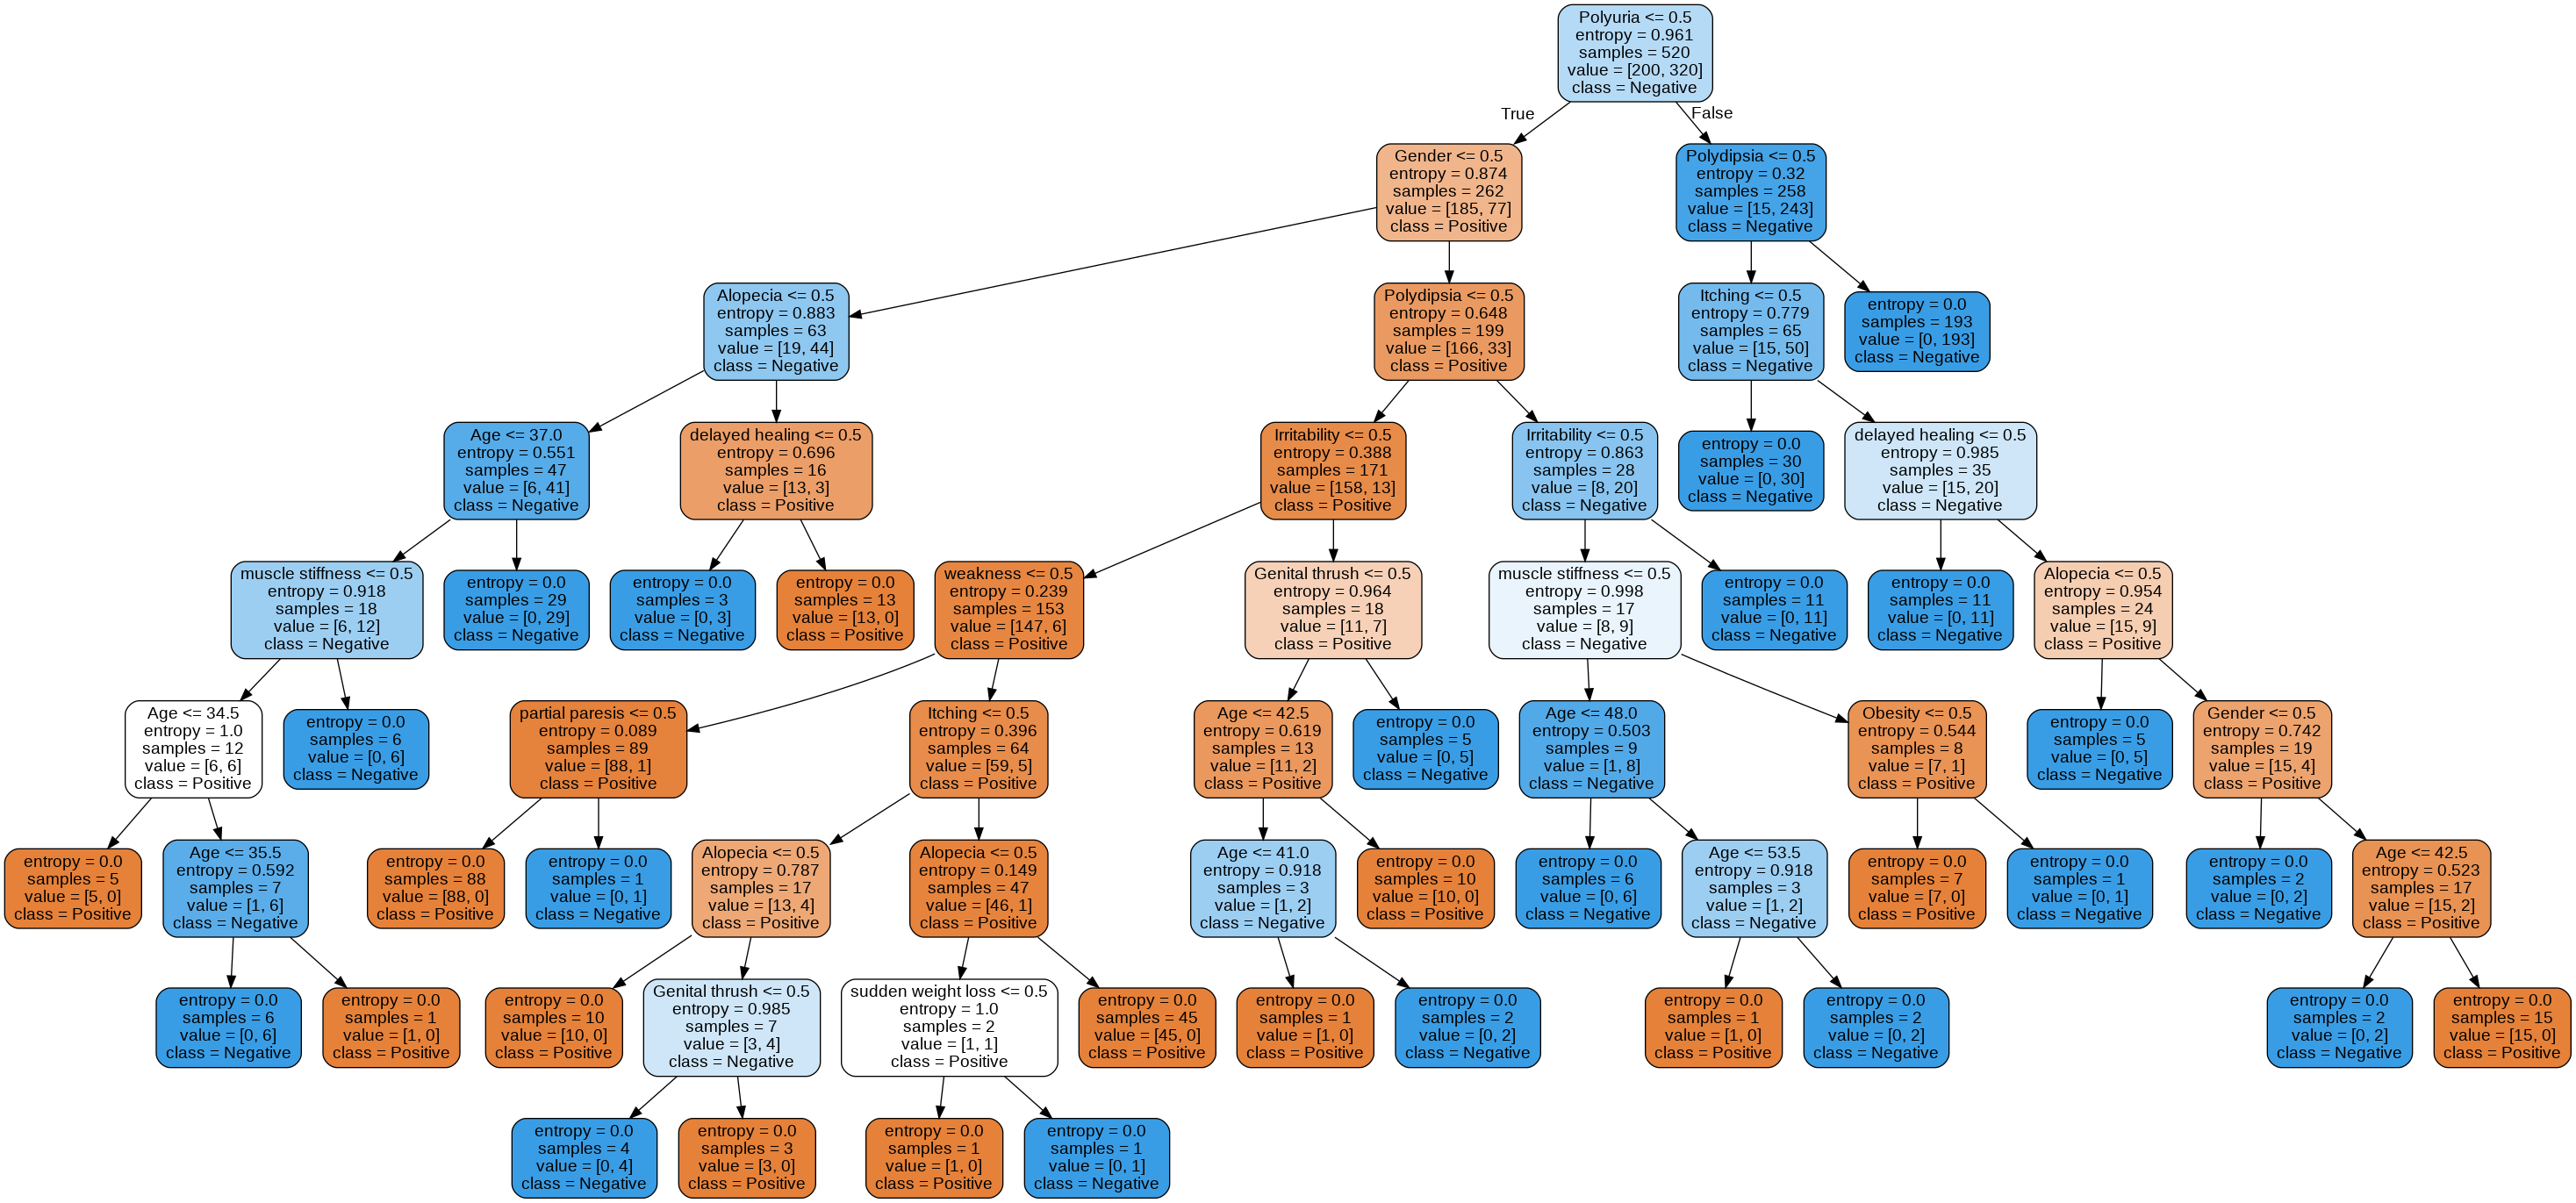

In [ ]:
dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = list(x.columns.values),
    class_names = ['Positive', 'Negative'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Model Testing

In [ ]:
tree_model.predict([[20, 	0, 	0, 	1, 	1, 	1, 	1, 	0, 	1, 	1, 	1, 	1, 	1, 	1, 	1, 	1],
                    [40, 	1, 	0, 	1, 	1, 	1, 	1, 	0, 	1, 	1, 	0, 	1, 	0, 	1, 	1, 	1]])

array([0, 1])